# Different CNN Architectures on MNIST image data

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


11493376/11490434 [==============================] - 11s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Model-1 with 3-layer Conv net

In [0]:

model_1 = Sequential()

#layer_1
model_1.add(Conv2D(32, kernel_size=(7, 7),padding='same',activation='relu',input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

#layer_2
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (5, 5), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

#layer_3
model_1.add(Conv2D(128, (3, 3),strides=(2,2), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

#Dense layer
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist1 = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score1 = model_1.evaluate(x_test, y_test, verbose=0)

print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.5057 - acc: 0.8346 - val_loss: 0.0852 - val_acc: 0.9749
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1315 - acc: 0.9636 - val_loss: 0.0473 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0964 - acc: 0.9726 - val_loss: 0.0341 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0785 - acc: 0.9781 - val_loss: 0.0322 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0690 - acc: 0.9808 - val_loss: 0.0287 - val_acc: 0.9922
Epoch 6/12
60000/60000 [=

### Error plot

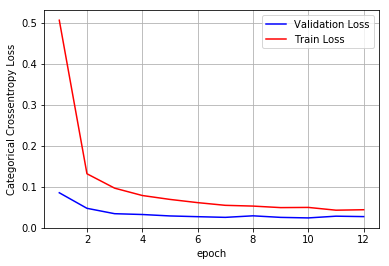

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = hist1.history['val_loss']
ty = hist1.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
    Here if we see as the number of epochs increases trian loss and validation loss decreases, and just for two epochs trian loss
    drastically decreases and giving high accuracy i.e more than 99% and this is a trrific result and the model is performing very well.

# Model-2 with 5-layers Conv nets

In [0]:
model_2 = Sequential()

#layer_1
model_2.add(Conv2D(16, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

#layer_2
model_2.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu'))
model_2.add(Dropout(0.25))

#layer_3
model_2.add(Conv2D(32, kernel_size=(7, 7),padding='same',activation='relu'))
model_2.add(Dropout(0.25))

#layer_4
model_2.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model_2.add(BatchNormalization())

#layer_5
model_2.add(Conv2D(128, kernel_size=(3, 3) ,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

#Dense layer
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist2 = model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model_2.evaluate(x_test, y_test, verbose=0)

print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 390s 6ms/step - loss: 0.3995 - acc: 0.8804 - val_loss: 0.0633 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 390s 6ms/step - loss: 0.1140 - acc: 0.9678 - val_loss: 0.0710 - val_acc: 0.9802
Epoch 3/12
60000/60000 [==============================] - 388s 6ms/step - loss: 0.0876 - acc: 0.9760 - val_loss: 0.0437 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 388s 6ms/step - loss: 0.0736 - acc: 0.9799 - val_loss: 0.0353 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0624 - acc: 0.9832 - val_loss: 0.0339 - val_acc: 0.9900
Epoch 6/12
60000/60000 [=

### Error plot

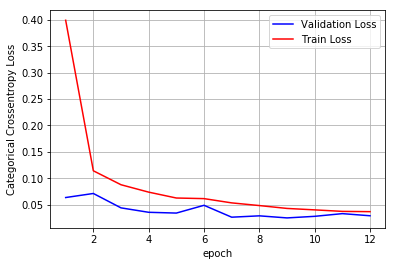

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = hist2.history['val_loss']
ty = hist2.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here if we see as the number of epochs increases trian loss and validation loss decreases, and if we notice validation loss is 
increases after few epochs and after converges gradually this is also performing similar to two layer conv net, giving high \
accuracy i.e more than 99% and this is a terrific result and the model is performing very well.

# Model-3 with 7- layer Conv nets

In [0]:
model_3 = Sequential()

#layer-1
model_3.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

#layer-2
model_3.add(Conv2D(32, kernel_size=(7, 7),padding='same',activation='relu'))
model_3.add(BatchNormalization())

#layer-3
model_3.add(Conv2D(64, kernel_size=(5, 5),padding='same',activation='relu'))
model_3.add(Dropout(0.25))

#layer-4
model_3.add(Conv2D(64, kernel_size=(5, 5),padding='same',activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

#layer-5
model_3.add(Conv2D(128, kernel_size=(5, 5),padding='same',activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

#layer-6
model_3.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())

#layer-7
model_3.add(Conv2D(128, kernel_size=(5, 5),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))


#Dense layer
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist3 = model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model_3.evaluate(x_test, y_test, verbose=0)

print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2515s 42ms/step - loss: 0.2375 - acc: 0.9275 - val_loss: 0.0432 - val_acc: 0.9863
Epoch 2/12
60000/60000 [==============================] - 2517s 42ms/step - loss: 0.0698 - acc: 0.9799 - val_loss: 0.0345 - val_acc: 0.9899
Epoch 3/12
60000/60000 [==============================] - 2518s 42ms/step - loss: 0.0487 - acc: 0.9862 - val_loss: 0.0547 - val_acc: 0.9849
Epoch 4/12
60000/60000 [==============================] - 2520s 42ms/step - loss: 0.0408 - acc: 0.9884 - val_loss: 0.0228 - val_acc: 0.9927
Epoch 5/12
60000/60000 [==============================] - 2504s 42ms/step - loss: 0.0370 - acc: 0.9894 - val_loss: 0.0203 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 2523s 42ms/step - loss: 0.0353 - acc: 0.9896 - val_loss: 0.0217 - val_acc: 0.9933
Epoch 7/12
60000/60000 [==============================] - 2506s 42ms/step - loss: 0.0310 - acc: 0.9912 - val_l

### Error plot 

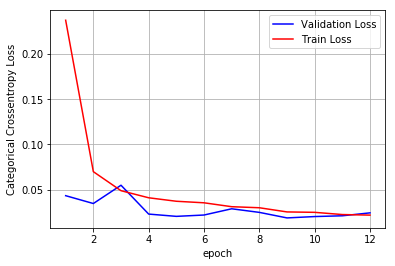

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

vy = hist3.history['val_loss']
ty = hist3.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here if we see as the number of epochs increases trian loss and validation loss decreases, and if we notice validation loss is 
increases after few epochs and again decrease and gradually converges,this is also performing similar to two layer and five layer
conv net, giving high accuracy i.e more than 99% and this is a terrific result and the model is performing very well.

# Conclusions 

In [1]:
from prettytable import PrettyTable
   
pt = PrettyTable()

pt.field_names = ["Model", "Test loss","Test Accuracy"]

pt.add_row(["3-layer cnn", "0.027", "0.992"])
pt.add_row(["5-layer cnn", "0.028", "0.992"])
pt.add_row(["7-layer cnn", "0.024", "0.993"])

print(pt)

+-------------+-----------+---------------+
|    Model    | Test loss | Test Accuracy |
+-------------+-----------+---------------+
| 3-layer cnn |   0.027   |     0.992     |
| 5-layer cnn |   0.028   |     0.992     |
| 7-layer cnn |   0.024   |     0.993     |
+-------------+-----------+---------------+


1. Here if we notice we are getting terrific results  in all the models.
2. Also we are converging very fast just for few epochs.
3. if we notice there is a very slight increase in test accuracy as the number of layers increases.